In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
#models
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
#model_selection
from sklearn.model_selection import GridSearchCV, cross_val_score, ShuffleSplit

In [27]:
data = pd.read_csv('used_cars_data.csv')
# I just noticed selling prices are in indian rupees, that's why I am going to divide selling price by 72 to go to usd
data['price_usd'] = data.selling_price.apply(lambda x: round(x/72,0))
data.drop(['selling_price'], axis = 'columns', inplace=True)
data

,name,year,km_driven,fuel,seller_type,transmission,owner,price_usd
0,Maruti 800 AC,2007,70000,Petrol,Individual,Manual,First Owner,833.0
1,Maruti Wagon R LXI Minor,2007,50000,Petrol,Individual,Manual,First Owner,1875.0
2,Hyundai Verna 1.6 SX,2012,100000,Diesel,Individual,Manual,First Owner,8333.0
3,Datsun RediGO T Option,2017,46000,Petrol,Individual,Manual,First Owner,3472.0
4,Honda Amaze VX i-DTEC,2014,141000,Diesel,Individual,Manual,Second Owner,6250.0
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,80000,Diesel,Individual,Manual,Second Owner,5694.0
4336,Hyundai i20 Magna 1.4 CRDi,2014,80000,Diesel,Individual,Manual,Second Owner,5694.0
4337,Maruti 800 AC BSIII,2009,83000,Petrol,Individual,Manual,Second Owner,1528.0
4338,Hyundai Creta 1.6 CRDi SX Option,2016,90000,Diesel,Individual,Manual,First Owner,12014.0


In [28]:
name_stats = data.groupby('name')['name'].agg('count').sort_values(ascending=False)
name_stats

name
Maruti Swift Dzire VDI                  69
Maruti Alto 800 LXI                     59
Maruti Alto LXi                         47
Hyundai EON Era Plus                    35
Maruti Alto LX                          35
                                        ..
Mahindra KUV 100 G80 K4 Plus             1
Mahindra KUV 100 mFALCON D75 K8          1
Mahindra KUV 100 mFALCON D75 K8 AW       1
Mahindra KUV 100 mFALCON G80 K2 Plus     1
Volvo XC60 D5 Inscription                1
Name: name, Length: 1491, dtype: int64

In [29]:
filtered_cars = name_stats[name_stats<4]

In [30]:
data.name = data.name.apply(lambda x: 'other' if x in filtered_cars else x)

In [31]:
# I am not sure if I should drop the name of the car
data.describe()

,year,km_driven,price_usd
count,4340.000000,4340.000000,4340.000000
mean,2013.090783,66215.777419,7001.770276
std,4.215344,46644.102194,8035.398793
min,1992.000000,1.000000,278.000000
25%,2011.000000,35000.000000,2899.500000
50%,2014.000000,60000.000000,4861.000000
75%,2016.000000,90000.000000,8333.000000
max,2020.000000,806599.000000,123611.000000


In [32]:
data

,name,year,km_driven,fuel,seller_type,transmission,owner,price_usd
0,Maruti 800 AC,2007,70000,Petrol,Individual,Manual,First Owner,833.0
1,Maruti Wagon R LXI Minor,2007,50000,Petrol,Individual,Manual,First Owner,1875.0
2,Hyundai Verna 1.6 SX,2012,100000,Diesel,Individual,Manual,First Owner,8333.0
3,Datsun RediGO T Option,2017,46000,Petrol,Individual,Manual,First Owner,3472.0
4,Honda Amaze VX i-DTEC,2014,141000,Diesel,Individual,Manual,Second Owner,6250.0
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,80000,Diesel,Individual,Manual,Second Owner,5694.0
4336,other,2014,80000,Diesel,Individual,Manual,Second Owner,5694.0
4337,Maruti 800 AC BSIII,2009,83000,Petrol,Individual,Manual,Second Owner,1528.0
4338,Hyundai Creta 1.6 CRDi SX Option,2016,90000,Diesel,Individual,Manual,First Owner,12014.0


In [33]:
# There are no null values in my dataset
data.isnull().sum()

name            0
year            0
km_driven       0
fuel            0
seller_type     0
transmission    0
owner           0
price_usd       0
dtype: int64

Text(0, 0.5, 'price')

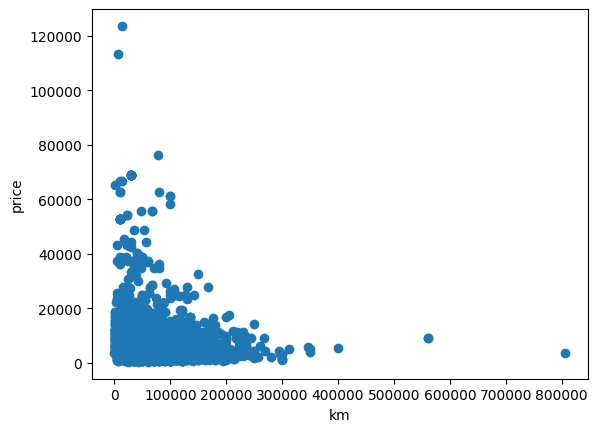

In [34]:
# for km_driven and prices both seem to have outliers. I would think that a car with more than 300.000 km would be an error. So I am going to filter
# from that value onwards.
plt.scatter(data.km_driven, data.price_usd)
plt.xlabel('km')
plt.ylabel('price')

# There seem to be some outliers, with low km and high price and high km and low price. I am going to filter those out

In [35]:
df1 = data.copy()
df1 = df1[df1.km_driven < df1.km_driven.mean()+3*df1.km_driven.std()]
df1
# With these I filtered 55 outliers

,name,year,km_driven,fuel,seller_type,transmission,owner,price_usd
0,Maruti 800 AC,2007,70000,Petrol,Individual,Manual,First Owner,833.0
1,Maruti Wagon R LXI Minor,2007,50000,Petrol,Individual,Manual,First Owner,1875.0
2,Hyundai Verna 1.6 SX,2012,100000,Diesel,Individual,Manual,First Owner,8333.0
3,Datsun RediGO T Option,2017,46000,Petrol,Individual,Manual,First Owner,3472.0
4,Honda Amaze VX i-DTEC,2014,141000,Diesel,Individual,Manual,Second Owner,6250.0
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,80000,Diesel,Individual,Manual,Second Owner,5694.0
4336,other,2014,80000,Diesel,Individual,Manual,Second Owner,5694.0
4337,Maruti 800 AC BSIII,2009,83000,Petrol,Individual,Manual,Second Owner,1528.0
4338,Hyundai Creta 1.6 CRDi SX Option,2016,90000,Diesel,Individual,Manual,First Owner,12014.0


(0.0, 30000.0)

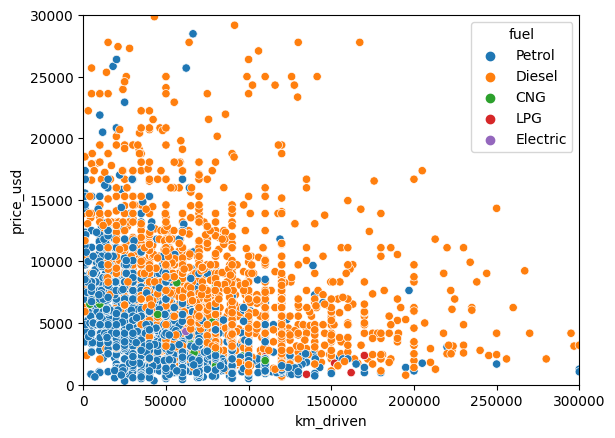

In [36]:
sns.scatterplot(x = data.km_driven, y = data.price_usd, hue = data.fuel)
plt.xlim(0,300000)
plt.ylim(0,30000)

In [37]:
df1 = df1[df1.price_usd <df1.price_usd.mean()+3*df1.price_usd.std()]
# With this I filtered 180 outliers
df1

,name,year,km_driven,fuel,seller_type,transmission,owner,price_usd
0,Maruti 800 AC,2007,70000,Petrol,Individual,Manual,First Owner,833.0
1,Maruti Wagon R LXI Minor,2007,50000,Petrol,Individual,Manual,First Owner,1875.0
2,Hyundai Verna 1.6 SX,2012,100000,Diesel,Individual,Manual,First Owner,8333.0
3,Datsun RediGO T Option,2017,46000,Petrol,Individual,Manual,First Owner,3472.0
4,Honda Amaze VX i-DTEC,2014,141000,Diesel,Individual,Manual,Second Owner,6250.0
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,80000,Diesel,Individual,Manual,Second Owner,5694.0
4336,other,2014,80000,Diesel,Individual,Manual,Second Owner,5694.0
4337,Maruti 800 AC BSIII,2009,83000,Petrol,Individual,Manual,Second Owner,1528.0
4338,Hyundai Creta 1.6 CRDi SX Option,2016,90000,Diesel,Individual,Manual,First Owner,12014.0


In [38]:
df1.describe()

,year,km_driven,price_usd
count,4193.000000,4193.000000,4193.000000
mean,2013.046745,64145.063439,6106.258288
std,4.204824,38856.681844,4627.483838
min,1992.000000,1.000000,278.000000
25%,2011.000000,35000.000000,2778.000000
50%,2014.000000,60000.000000,4861.000000
75%,2016.000000,90000.000000,8333.000000
max,2020.000000,205000.000000,30556.000000


In [39]:
# I would say any car would be worth at least 500 dollars, I am going to take any values below that as outliers

df2 = df1.copy()

df2 = df2[df2.price_usd > 500]
df2

,name,year,km_driven,fuel,seller_type,transmission,owner,price_usd
0,Maruti 800 AC,2007,70000,Petrol,Individual,Manual,First Owner,833.0
1,Maruti Wagon R LXI Minor,2007,50000,Petrol,Individual,Manual,First Owner,1875.0
2,Hyundai Verna 1.6 SX,2012,100000,Diesel,Individual,Manual,First Owner,8333.0
3,Datsun RediGO T Option,2017,46000,Petrol,Individual,Manual,First Owner,3472.0
4,Honda Amaze VX i-DTEC,2014,141000,Diesel,Individual,Manual,Second Owner,6250.0
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,80000,Diesel,Individual,Manual,Second Owner,5694.0
4336,other,2014,80000,Diesel,Individual,Manual,Second Owner,5694.0
4337,Maruti 800 AC BSIII,2009,83000,Petrol,Individual,Manual,Second Owner,1528.0
4338,Hyundai Creta 1.6 CRDi SX Option,2016,90000,Diesel,Individual,Manual,First Owner,12014.0


In [40]:
# The dataset is ready to be modeled.
df2.describe()

,year,km_driven,price_usd
count,4187.000000,4187.000000,4187.000000
mean,2013.057798,64162.289945,6114.421304
std,4.194849,38871.173547,4625.766010
min,1992.000000,1.000000,521.000000
25%,2011.000000,35000.000000,2778.000000
50%,2014.000000,60000.000000,4861.000000
75%,2016.000000,90000.000000,8333.000000
max,2020.000000,205000.000000,30556.000000


In [41]:
# I am going to switch the position of the columns for future convenience.
names = df2.name
df3 = df2.drop('name', axis = 'columns')
df3['name'] = names
df3

,year,km_driven,fuel,seller_type,transmission,owner,price_usd,name
0,2007,70000,Petrol,Individual,Manual,First Owner,833.0,Maruti 800 AC
1,2007,50000,Petrol,Individual,Manual,First Owner,1875.0,Maruti Wagon R LXI Minor
2,2012,100000,Diesel,Individual,Manual,First Owner,8333.0,Hyundai Verna 1.6 SX
3,2017,46000,Petrol,Individual,Manual,First Owner,3472.0,Datsun RediGO T Option
4,2014,141000,Diesel,Individual,Manual,Second Owner,6250.0,Honda Amaze VX i-DTEC
...,...,...,...,...,...,...,...,...
4335,2014,80000,Diesel,Individual,Manual,Second Owner,5694.0,Hyundai i20 Magna 1.4 CRDi (Diesel)
4336,2014,80000,Diesel,Individual,Manual,Second Owner,5694.0,other
4337,2009,83000,Petrol,Individual,Manual,Second Owner,1528.0,Maruti 800 AC BSIII
4338,2016,90000,Diesel,Individual,Manual,First Owner,12014.0,Hyundai Creta 1.6 CRDi SX Option


In [42]:
# I shall now begin working on the features to improve the accuracy of my model
df3 = pd.get_dummies(df3, dtype = int, drop_first=True)
df3

,year,km_driven,price_usd,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,...,name_Toyota Innova 2.5 V Diesel 8-seater,name_Toyota Innova 2.5 VX (Diesel) 7 Seater,name_Toyota Innova 2.5 VX (Diesel) 8 Seater,name_Toyota Innova Crysta 2.4 VX MT BSIV,name_Volkswagen Polo Diesel Highline 1.2L,name_Volkswagen Polo Diesel Trendline 1.2L,name_Volkswagen Polo GTI,name_Volkswagen Vento 1.5 TDI Highline,name_Volkswagen Vento Diesel Highline,name_other
0,2007,70000,833.0,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,2007,50000,1875.0,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2012,100000,8333.0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2017,46000,3472.0,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2014,141000,6250.0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,2014,80000,5694.0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4336,2014,80000,5694.0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
4337,2009,83000,1528.0,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4338,2016,90000,12014.0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


<Axes: xlabel='year', ylabel='price_usd'>

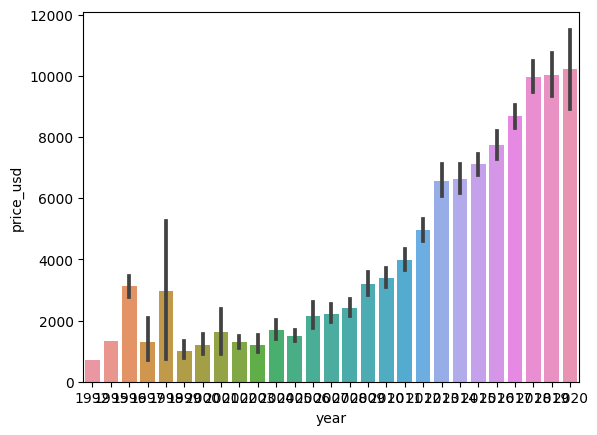

In [43]:
sns.barplot(x = df3.year, y = df3.price_usd)

In [44]:
X = df3.drop(['price_usd'], axis = 'columns')
y = df3.price_usd

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [46]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.684457172123489

In [47]:
# I am going to test if dropping the names I get a better accuracy for my model.
df4 = df2.copy()
df4.drop(['name'], axis = 'columns', inplace = True)
df4

,year,km_driven,fuel,seller_type,transmission,owner,price_usd
0,2007,70000,Petrol,Individual,Manual,First Owner,833.0
1,2007,50000,Petrol,Individual,Manual,First Owner,1875.0
2,2012,100000,Diesel,Individual,Manual,First Owner,8333.0
3,2017,46000,Petrol,Individual,Manual,First Owner,3472.0
4,2014,141000,Diesel,Individual,Manual,Second Owner,6250.0
...,...,...,...,...,...,...,...
4335,2014,80000,Diesel,Individual,Manual,Second Owner,5694.0
4336,2014,80000,Diesel,Individual,Manual,Second Owner,5694.0
4337,2009,83000,Petrol,Individual,Manual,Second Owner,1528.0
4338,2016,90000,Diesel,Individual,Manual,First Owner,12014.0


In [48]:
df4 = pd.get_dummies(df4, dtype = int, drop_first=True)


X_name = df4.drop(['price_usd'], axis = 'columns')
y_name = df4.price_usd


X_train_name, X_test_name, y_train_name, y_test_name = train_test_split(X_name, y_name, test_size=0.2)
df4

,year,km_driven,price_usd,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2007,70000,833.0,0,0,0,1,1,0,1,0,0,0,0
1,2007,50000,1875.0,0,0,0,1,1,0,1,0,0,0,0
2,2012,100000,8333.0,1,0,0,0,1,0,1,0,0,0,0
3,2017,46000,3472.0,0,0,0,1,1,0,1,0,0,0,0
4,2014,141000,6250.0,1,0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,2014,80000,5694.0,1,0,0,0,1,0,1,0,1,0,0
4336,2014,80000,5694.0,1,0,0,0,1,0,1,0,1,0,0
4337,2009,83000,1528.0,0,0,0,1,1,0,1,0,1,0,0
4338,2016,90000,12014.0,1,0,0,0,1,0,1,0,0,0,0


In [49]:
lr_name = LinearRegression()
lr_name.fit(X_train_name, y_train_name)

LinearRegression()

In [50]:
score_names = lr_name.score(X_test_name, y_test_name)
score = lr.score(X_test, y_test)
print(f'score with names:{round(score,2)}, score without names {round(score_names,2)}')
# It is better to include car names as a feature as I get a better accuracy.

score with names:0.68, score without names 0.54


In [51]:
# Now I am going to use cross validation.
cv = ShuffleSplit(n_splits = 5, test_size = 0.2)
scores = cross_val_score(LinearRegression(), X, y, cv=cv)
mean_score = np.mean(scores)
mean_score

-6937913665.608661

In [52]:
params = {
    'linear_regression': {
        'model': LinearRegression(),
        'params':{
            'fit_intercept': [True]
        }
    },
    'lasso': {
        'model': Lasso(),
        'params': {
            'alpha': [1,2],
            'selection': ['random', 'cyclic']
        }
    },
    'decision_tree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'criterion': ['poisson', 'friedman_mse', 'absolute_error'],
            'splitter': ['best', 'random']
        }
    },
    'gradient_boosting': {
        'model': GradientBoostingRegressor(),
        'params': {
            'loss': ['squared_error', 'absolute_error','quantile'],
            'criterion': ['friedman_mse', 'squared_error'],
            'alpha': [0.1, 0.4, 0.9]
        }
    }
}
params.items()

dict_items([('linear_regression', {'model': LinearRegression(), 'params': {'fit_intercept': [True]}}), ('lasso', {'model': Lasso(), 'params': {'alpha': [1, 2], 'selection': ['random', 'cyclic']}}), ('decision_tree', {'model': DecisionTreeRegressor(), 'params': {'criterion': ['poisson', 'friedman_mse', 'absolute_error'], 'splitter': ['best', 'random']}}), ('gradient_boosting', {'model': GradientBoostingRegressor(), 'params': {'loss': ['squared_error', 'absolute_error', 'quantile'], 'criterion': ['friedman_mse', 'squared_error'], 'alpha': [0.1, 0.4, 0.9]}})])

In [53]:
# I will use GridSearchCV to do some hyper parameter tuning to get the best model for my data.
scores = []
cv = ShuffleSplit(n_splits=5, test_size=0.2)

for model_name, mp in params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv = cv, return_train_score=False)
    clf.fit(X,y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

In [54]:
pd.DataFrame(scores, columns = ['model', 'best_score', 'best_params'])
#Linear regression model gave me the best results. However the model's score is still rather low.

,model,best_score,best_params
0,linear_regression,0.655897,{'fit_intercept': True}
1,lasso,0.668299,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.565862,"{'criterion': 'friedman_mse', 'splitter': 'ran..."
3,gradient_boosting,0.641607,"{'alpha': 0.1, 'criterion': 'squared_error', '..."


In [56]:
# I export my model for further use in the future.
import pickle
with open('used_cars_model.pickle', 'wb') as f:
    pickle.dump(lr,f)

import json

columns = {
    'data_columns': [col.lower() for col in X.columns]
}
with open('columns.json', 'w') as f:
    f.write(json.dumps(columns))